In [1]:
import pandas as pd

data=pd.read_csv("../resources/csv/weatherHistory.csv")
print(data.shape)
data.head()

(96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
import pandas as pd

# 读取原始CSV文件
df=pd.read_csv("../resources/csv/weatherHistory.csv")

# 移除时区信息并将日期时间列解析为Pandas的日期时间类型(包括毫秒)
df['Formatted Date']=pd.to_datetime(df['Formatted Date'].str.replace(r'\s+\+\d{4}','',regex=True),
    format='%Y-%m-%d %H:%M:%S.%f',utc=True)

# 将日期时间列设置为索引
df.set_index('Formatted Date',inplace=True)

# 提取风速列
selected_column=df[['Wind Speed (km/h)']]

# 按照一天(24小时)的平均值重新采样
daily_avg_wind_speed=selected_column.resample('D').mean()

# 保存结果到新的CSV文件
# daily_avg_wind_speed.to_csv('../sources/csv/wind_speed.csv')
daily_avg_wind_speed

,Wind Speed (km/h)
Formatted Date,
2006-01-01 00:00:00+00:00,21.372750
2006-01-02 00:00:00+00:00,17.551683
2006-01-03 00:00:00+00:00,8.417617
2006-01-04 00:00:00+00:00,11.579925
2006-01-05 00:00:00+00:00,9.515100
...,...
2016-12-27 00:00:00+00:00,10.980200
2016-12-28 00:00:00+00:00,10.969467
2016-12-29 00:00:00+00:00,10.892992


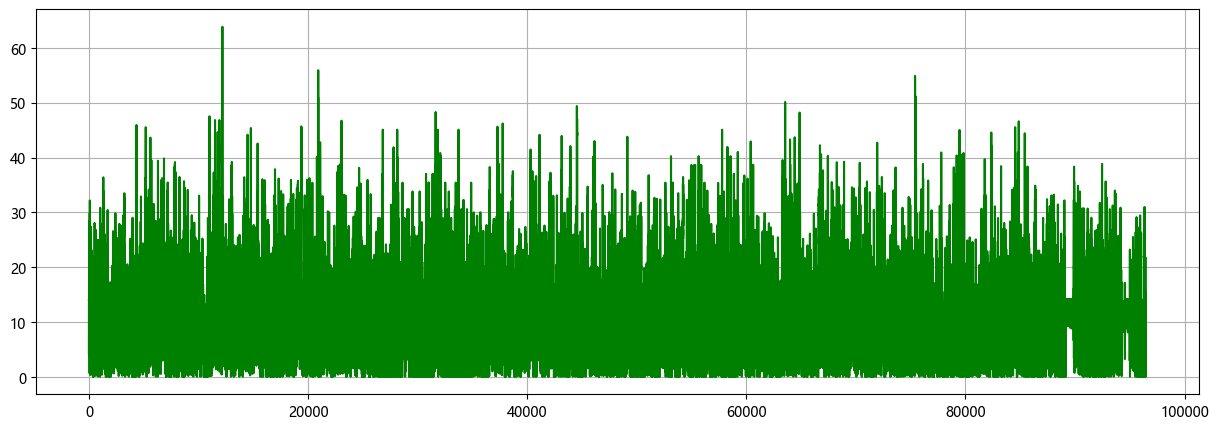

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font",family='Microsoft YaHei')

# 读取数据
data=pd.read_csv("../resources/csv/weatherHistory.csv")

# 可视化
plt.figure(figsize=(15,5),dpi=100)
plt.grid(True)
plt.plot(data['Wind Speed (km/h)'],color='green')
plt.show()